# Data Preprocessing and EDA 3

# Final Dataset

In [62]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import tensorflow as tf
import seaborn as sns
import sys 
import shutil
import random
from PIL import Image
from imgaug import augmenters as iaa
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.preprocessing import image_dataset_from_directory


# For reproducibility
np.random.seed(42)
# Source: https://www.tensorflow.org/api_docs/python/tf/keras/utils/set_random_seed
tf.keras.utils.set_random_seed(42)

In [63]:
# Importing global variables
sys.path.append('./Main/Helper/')
import helper as hp

In [2]:
# Create base_path variable for continued usage
base_path = './Data/Combined_Data/'

# Get the shape of a sample image
image_shape = img_to_array(load_img(base_path + '/train/angry/Training_21220561.jpg')).shape

# Print shape of sample image
print(image_shape)

# Set variable for width and height of image
w = image_shape[0]
h = image_shape[1]

(48, 48, 3)


In [4]:
# Flow from directory
# Code modified from: Lesson 8.06-CNN
Combined_Data_train = image_dataset_from_directory(
    base_path + '/train',
    image_size=(w,h),
    batch_size=32,
    seed=42,
    color_mode= 'grayscale',
    label_mode='categorical'
)


Combined_Data_val = image_dataset_from_directory(
    base_path + '/test',
    image_size=(w,h),
    batch_size=32,
    color_mode= 'grayscale',
    label_mode='categorical',
    shuffle= False
)

Found 46196 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [23]:
Combined_Data_train.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [7]:
hp.print_class_counts(Combined_Data_train)

2023-06-02 00:07:31.628025: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


Index 0: angry - Count: 7213, Percentage: 15.61%
Index 1: disgust - Count: 2913, Percentage: 6.31%
Index 2: fear - Count: 7215, Percentage: 15.62%
Index 3: happy - Count: 7215, Percentage: 15.62%
Index 4: neutral - Count: 7215, Percentage: 15.62%
Index 5: sad - Count: 7215, Percentage: 15.62%
Index 6: surprise - Count: 7210, Percentage: 15.61%


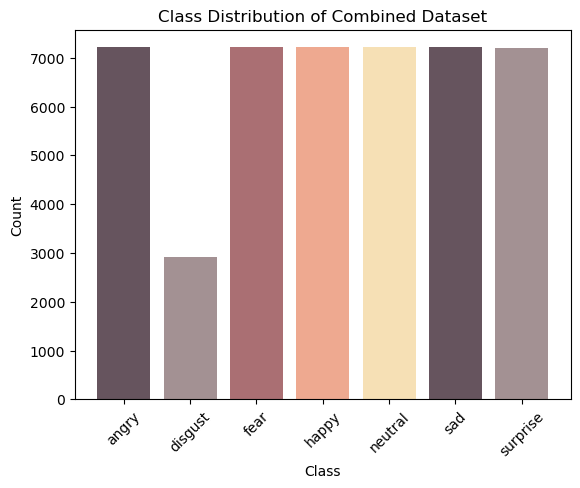

In [66]:
title = 'Class Distribution of Combined Dataset'

hp.plot_class_distribution(Combined_Data_train, title)

## Data augmentation on minority class
We see that even with added images of disgust class from the `AffectNet` dataset, our class distribution is still imbalanced. To further combat class imbalance, data augmentation will be employed to the minority class, `disgust.`

In [28]:
#Source inspo: https://www.analyticsvidhya.com/blog/2022/04/image-augmentation-using-3-python-libraries/
# Define the augmentation sequence
augmentation = iaa.Sequential([
    iaa.Fliplr(1.0),                       # Randomly flip images horizontally with a 100% chance
    iaa.LinearContrast((0.6, 0.4)),        # Adjust image contrast
    iaa.Add((-10, 10), per_channel=0.5),   # Randomly adjust brightness of images
    iaa.Crop(percent=(0, 0.3))             # Randomly crop images
])

# Create a directory to save the augmented images
save_dir = './Data/Combined_Data/train/augmented_disgust'
os.makedirs(save_dir, exist_ok=True)

# Get the list of filenames from the directory
disgust_samples = os.listdir('./Data/Combined_Data/train/disgust')

# Perform augmentation on 'disgust' class images and save them
for filename in disgust_samples:
    # Open the original image using PIL
    image = Image.open(os.path.join('./Data/Combined_Data/train/disgust', filename))

    # Apply augmentation to the image (returns a NumPy array)
    augmented_image = augmentation(image=np.array(image))
    
    # Convert the augmented image back to PIL format
    augmented_image = Image.fromarray(augmented_image)
    
    # Create the filename for the augmented image
    augmented_filename = os.path.join(save_dir, 'aug1_' + os.path.basename(filename))
    
    # Save the augmented image
    augmented_image.save(augmented_filename)

In [40]:
#Source inspo: https://www.analyticsvidhya.com/blog/2022/04/image-augmentation-using-3-python-libraries/
# Define the 2nd augmentation sequence
augmentation2 = iaa.Sequential([
    iaa.SigmoidContrast((5,10)),     # Randomly adjusts contrast
    iaa.Affine(shear=(-40,40)),  # Randomly shear image
    iaa.Crop(percent=(0, 0.3))   # Randomly crop images
])

# Create a directory to save the augmented images
save_dir = './Data/Combined_Data/train/augmented2_disgust'
os.makedirs(save_dir, exist_ok=True)

# Get the list of filenames from the directory
disgust_samples = os.listdir('./Data/Combined_Data/train/disgust')

# Perform augmentation on 'disgust' class images and save them
for filename in disgust_samples:
    # Open the original image using PIL
    image = Image.open(os.path.join('./Data/Combined_Data/train/disgust', filename))

    # Apply augmentation to the image (returns a NumPy array)
    augmented_image = augmentation2(image=np.array(image))
    
    # Convert the augmented image back to PIL format
    augmented_image = Image.fromarray(augmented_image)
    
    # Create the filename for the augmented image
    augmented_filename = os.path.join(save_dir, 'aug2_' + os.path.basename(filename))
    
    # Save the augmented image
    augmented_image.save(augmented_filename)

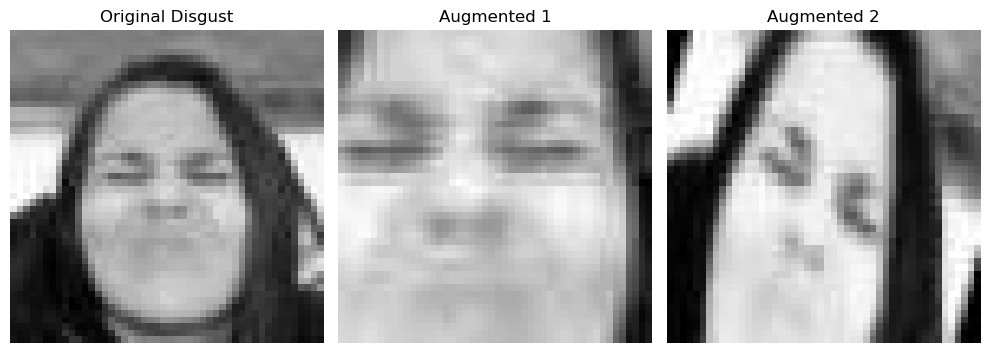

In [41]:
#Load sample image from AffectNet
image = Image.open('./Data/Combined_Data/train/disgust/ffhq_21.jpg')
image2 = Image.open('./Data/Combined_Data/train/augmented_disgust/aug1_ffhq_21.jpg')
image3 = Image.open('./Data/Combined_Data/train/augmented2_disgust/aug2_ffhq_21.jpg')

# Create a figure with three subplots
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

# Plot the first image
axes[0].imshow(image, cmap='gray')
axes[0].axis('off')
axes[0].set_title('Original Disgust')

# Plot the second image
axes[1].imshow(image2, cmap='gray')
axes[1].axis('off')
axes[1].set_title('Augmented 1')

# Plot the third image
axes[2].imshow(image3, cmap='gray')
axes[2].axis('off')
axes[2].set_title('Augmented 2')

# Adjust the spacing between subplots
plt.tight_layout()


# Save the plot as an image
plt.savefig('./Images/Augmented Disgust Class.jpg')

# Display the subplots
plt.show();

The three photos above exemplify the image augmentations that took place on the minority disgust class. This will not only help balance the class distributino, but also introduce variations.

In [46]:
# Define the source folder
source_folder = './Data/Combined_Data/train/augmented2_disgust'

# Define the destination folder
destination_folder = './Data/Final/train/disgust'

# Create the destination folder if it doesn't exist
os.makedirs(destination_folder, exist_ok=True)

# Select 1390 random files from augmented2_disgust folder
files_in_augmented2_disgust = os.listdir(source_folder)
files_to_copy = random.sample(files_in_augmented2_disgust, 1390)

# Copy the selected files from source folder to the destination folder
for filename in files_to_copy:
    source_path = os.path.join(source_folder, filename)
    destination_path = os.path.join(destination_folder, filename)
    
    if os.path.isfile(source_path):  # Check if the item is a file
        shutil.copyfile(source_path, destination_path)

In [47]:
# Define the source folders
source_folders = ['./Data/Combined_Data/train/augmented_disgust',
                  './Data/Combined_Data/train/disgust']

# Define the destination folder
destination_folder = './Data/Final/train/disgust'

# Copy all the images from source folders to the destination folder
for folder in source_folders:
    filenames = os.listdir(folder)
    for filename in filenames:
        source_path = os.path.join(folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        if os.path.isfile(source_path):  # Check if the item is a file
            shutil.copyfile(source_path, destination_path)

In [48]:
# Define the source folders
source_folders = ['./Data/Combined_Data/train/angry',
                  './Data/Combined_Data/train/fear',
                  './Data/Combined_Data/train/happy',
                  './Data/Combined_Data/train/neutral',
                  './Data/Combined_Data/train/sad',
                  './Data/Combined_Data/train/surprise']

# Define the destination parent folder
destination_parent_folder = './Data/Final/train'

# Copy all the images from source folders to separate destination folders
for folder in source_folders:
    class_name = os.path.basename(folder)  # Extract the class name from the folder path
    destination_folder = os.path.join(destination_parent_folder, class_name)
    os.makedirs(destination_folder, exist_ok=True)  # Create the destination folder if it doesn't exist

    filenames = os.listdir(folder)
    for filename in filenames:
        source_path = os.path.join(folder, filename)
        destination_path = os.path.join(destination_folder, filename)
        
        if os.path.isfile(source_path):  # Check if the item is a file
            shutil.copyfile(source_path, destination_path)

In [49]:
# Define the source folder
source_folder = './Data/Combined_Data/test'

# Define the destination folder
destination_folder = './Data/Final/test'

# Copy the entire test folder to the destination folder
shutil.copytree(source_folder, destination_folder)

'./Data/Final/test'

In [50]:
base_path = './Data/Final'
# Flow from directory
# Code modified from: Lesson 8.06-CNN
train = image_dataset_from_directory(
    base_path + '/train',
    image_size=(w,h),
    batch_size=32,
    seed=42,
    color_mode= 'grayscale',
    label_mode='categorical'
)


val = image_dataset_from_directory(
    base_path + '/test',
    image_size=(w,h),
    batch_size=32,
    color_mode= 'grayscale',
    label_mode='categorical',
    shuffle= False
)

Found 50499 files belonging to 7 classes.
Found 7178 files belonging to 7 classes.


In [51]:
train.class_names

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']

In [52]:
hp.print_class_counts(train)

Index 0: angry - Count: 7213, Percentage: 14.28%
Index 1: disgust - Count: 7216, Percentage: 14.29%
Index 2: fear - Count: 7215, Percentage: 14.29%
Index 3: happy - Count: 7215, Percentage: 14.29%
Index 4: neutral - Count: 7215, Percentage: 14.29%
Index 5: sad - Count: 7215, Percentage: 14.29%
Index 6: surprise - Count: 7210, Percentage: 14.28%


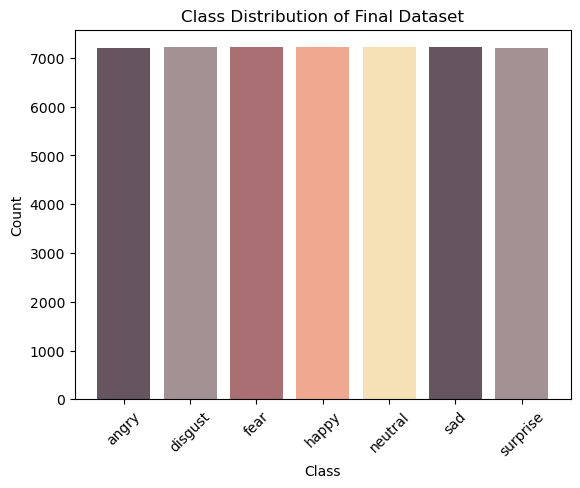

In [69]:
title = 'Class Distribution of Final Dataset'

hp.plot_class_distribution(train, title)

Classes are now much more eventy distributed with each class having around 7,215 images.

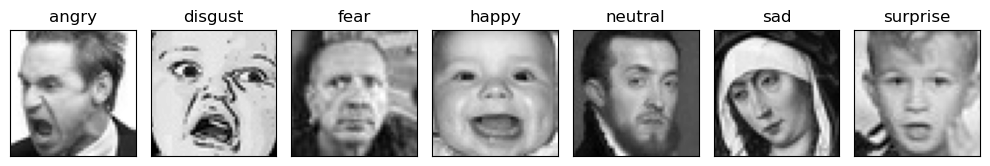

In [80]:
# Create a figure with a single row and 7 subplots
fig, axes = plt.subplots(1, 7, figsize=(10, 2))

# Iterate over the class names
for class_index, class_name in enumerate(class_names):
    # Find the index of the class in the class_names list
    class_label = class_names.index(class_name)

    # Iterate over the train dataset
    found_image = False
    for images, labels in train:
        # Find the indices of the images with the current class label
        class_indices = (labels.numpy().argmax(axis=1) == class_label).nonzero()[0]

        if len(class_indices) > 0:
            # Get the first image with the current class label
            image_index = class_indices[0]

            # Get the image tensor and convert it to a NumPy array
            image = images[image_index].numpy()

            # Reshape and normalize the image
            image = image.reshape((h, w)) / 255.0

            # Display the image in the corresponding subplot
            ax = axes[class_index]
            ax.imshow(image, cmap='gray')
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_title(class_name)

            found_image = True
            break  # Display only the first image of each class

plt.tight_layout()
plt.savefig('./Images/Sample Img of Each Class in Final.jpg')
plt.show();